In this notebook we will be training a bidireftional LSTM (biLSTM) model. Please use the table of contents on the left panel to navigate between sections.<br>

Performance summary: <br>
The biLSTM model showed a test accuracy of 21.26%, an AUROC of 0.592, and an F1 score of 0.190.

In [1]:
import sys
import os
import torch
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import pandas as pd
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt
from torch.optim import Adam, SGD
from keras.layers import Input, LSTM
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
import keras
from matplotlib.pyplot import figure
from keras.callbacks import EarlyStopping, ModelCheckpoint


# Load Data

In [ ]:
# mount to google drive

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


Load data with RNA sequences each containing 4,000 nt:

In [ ]:
X_train=np.load("/gdrive/My Drive/Final_Project/data/X_train.npy")
X_val=np.load("/gdrive/My Drive/Final_Project/data/X_val.npy")
X_test=np.load("/gdrive/My Drive/Final_Project/data/X_test.npy")
y_train=np.load("/gdrive/My Drive/Final_Project/data/y_train.npy")
y_val=np.load("/gdrive/My Drive/Final_Project/data/y_val.npy")
y_test=np.load("/gdrive/My Drive/Final_Project/data/y_test.npy")

# Train Model

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  x = range(1, len(acc) + 1)

  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.plot(x, acc, 'b', label='Training acc')
  plt.plot(x, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(x, loss, 'b', label='Training loss')
  plt.plot(x, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

# Utility function: Display model score(Loss & Accuracy) across all sets.

def display_model_score(model, train, val, test, batch_size):

  train_score = model.evaluate(train[0], train[1], batch_size=batch_size, verbose=1)
  print('Train loss: ', train_score[0])
  print('Train accuracy: ', train_score[1])
  print('-'*70)

  val_score = model.evaluate(val[0], val[1], batch_size=batch_size, verbose=1)
  print('Val loss: ', val_score[0])
  print('Val accuracy: ', val_score[1])
  print('-'*70)
  
  test_score = model.evaluate(test[0], test[1], batch_size=batch_size, verbose=1)
  print('Test loss: ', test_score[0])
  print('Test accuracy: ', test_score[1])

In [2]:
from keras.models import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM

model = Sequential()
model.add(Embedding(input_dim=5,output_dim=64,input_length=4000))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(7, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [3]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4000, 64)          320       
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 7)                 903       
                                                                 
Total params: 67,271
Trainable params: 67,271
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
history = model.fit(X_train, y_train, 
                     validation_data=(X_val, y_val), 
                     epochs=8, 
                     batch_size=256, 
                     verbose=1, 
                     callbacks=[early_stopping])


Epoch 1/8
6/6 [==============================] - 135s 22s/step - loss: 1.8796 - accuracy: 0.2119 - val_loss: 1.8787 - val_accuracy: 0.1897
Epoch 2/8
6/6 [==============================] - 132s 22s/step - loss: 1.8747 - accuracy: 0.2220 - val_loss: 1.8683 - val_accuracy: 0.2356
Epoch 3/8
6/6 [==============================] - 132s 22s/step - loss: 1.8679 - accuracy: 0.2263 - val_loss: 1.8610 - val_accuracy: 0.1724
Epoch 4/8
6/6 [==============================] - 133s 22s/step - loss: 1.8655 - accuracy: 0.2241 - val_loss: 1.8515 - val_accuracy: 0.2299
Epoch 5/8
6/6 [==============================] - 133s 22s/step - loss: 1.8567 - accuracy: 0.2306 - val_loss: 1.8413 - val_accuracy: 0.2299
Epoch 6/8
6/6 [==============================] - 135s 22s/step - loss: 1.8486 - accuracy: 0.2364 - val_loss: 1.8270 - val_accuracy: 0.2299
Epoch 7/8
6/6 [==============================] - 131s 22s/step - loss: 1.8433 - accuracy: 0.2263 - val_loss: 1.8173 - val_accuracy: 0.2126
Epoch 8/8
6/6 [============

# Evaluate Model Performance

## Accuracy

6/6 [==============================] - 42s 6s/step - loss: 1.8296 - accuracy: 0.2356
Train loss:  1.8296211957931519
Train accuracy:  0.23563218116760254
----------------------------------------------------------------------
1/1 [==============================] - 5s 5s/step - loss: 1.8164 - accuracy: 0.2299
Val loss:  1.8164196014404297
Val accuracy:  0.2298850566148758
----------------------------------------------------------------------
1/1 [==============================] - 5s 5s/step - loss: 1.8882 - accuracy: 0.2126
Test loss:  1.8882278203964233
Test accuracy:  0.21264368295669556


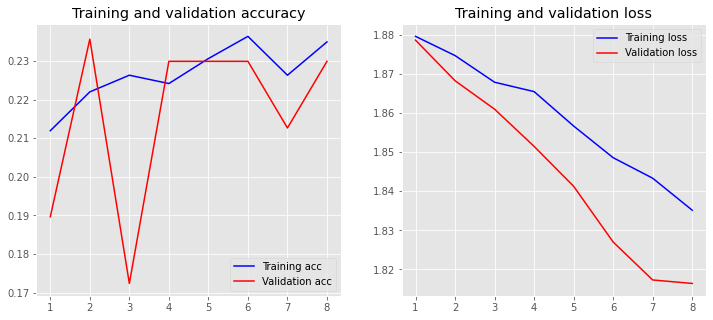

In [ ]:
display_model_score(model,
    [X_train, y_train],
    [X_val, y_val],
    [X_test, y_test],
    256)

plot_history(history)

## AUROC

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, multi_class='ovo', average='weighted')

0.5915904846669934

## Confusion Matrix and F1 Score

In [ ]:
from sklearn.metrics import confusion_matrix
# convert the probabilities for each of the 7 classes in y_pred to the class with the highest proba
index = 0
y_pred_ = []

for i in y_pred:
  y_pred_.append(np.argmax(i))
  index+=1

'Cytoplasm' = 0, 'Cytosol' = 1, 'Nucleus' = 2, 'Ribosome' = 3, 'chromatin' = 4, 'nucleolus' = 5, 'nucleoplasm' = 6

The i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class. True values corresponds to the y-axis, prediction corresponds to the x-axis.

In [ ]:
cm = confusion_matrix(y_test, y_pred_)
cm

array([[ 3,  1,  0,  6,  2,  0, 10],
       [ 1, 10,  0,  8,  1,  1,  1],
       [ 0,  4,  0,  7,  2,  0,  8],
       [ 4,  5,  0,  9,  2,  0,  6],
       [ 0,  7,  0,  7,  3,  6,  7],
       [ 0,  8,  0,  5,  0,  7,  1],
       [ 1,  9,  0, 10,  1,  6,  5]])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_, average='weighted')

0.1899835365745998

# Save Model and History

We will save the models so they can be loaded again later:

In [ ]:
model.save('LSTM.h5')  # creates a HDF5 file

Likewise, save history:

In [ ]:
model.save('history_LSTM.h5')